In [61]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [62]:
df= pd.read_excel("data.xlsx")
df.head()

,Year,Prod
0,1995,21829000
1,1996,16239000
2,1997,15000000
3,1998,14268000
4,1999,18250000


In [63]:
df.shape

(27, 2)

In [64]:
x=df["Year"]
y=df["Prod"]

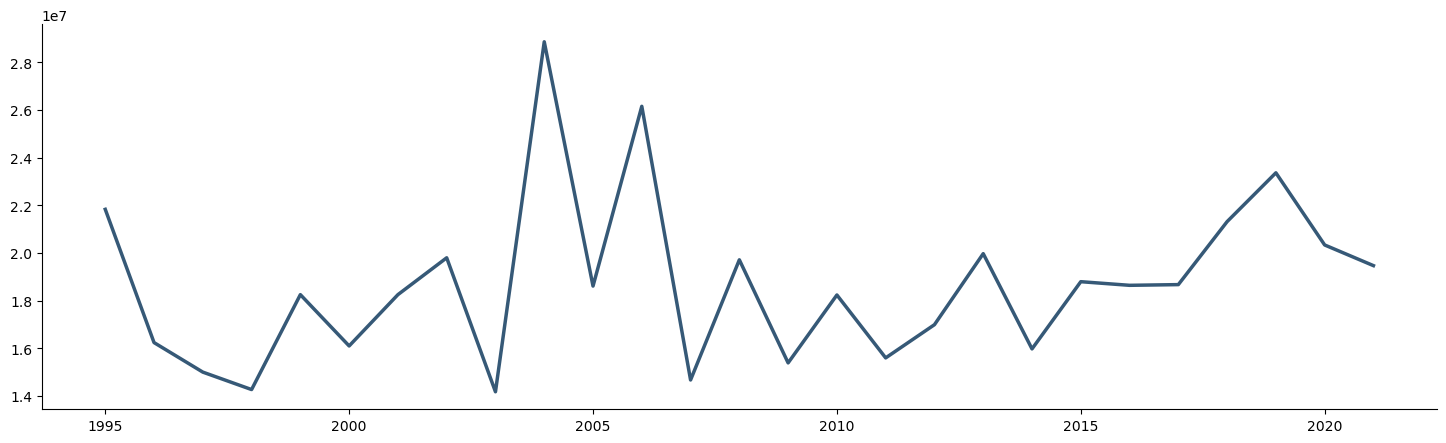

In [65]:
plt.plot(x,y)

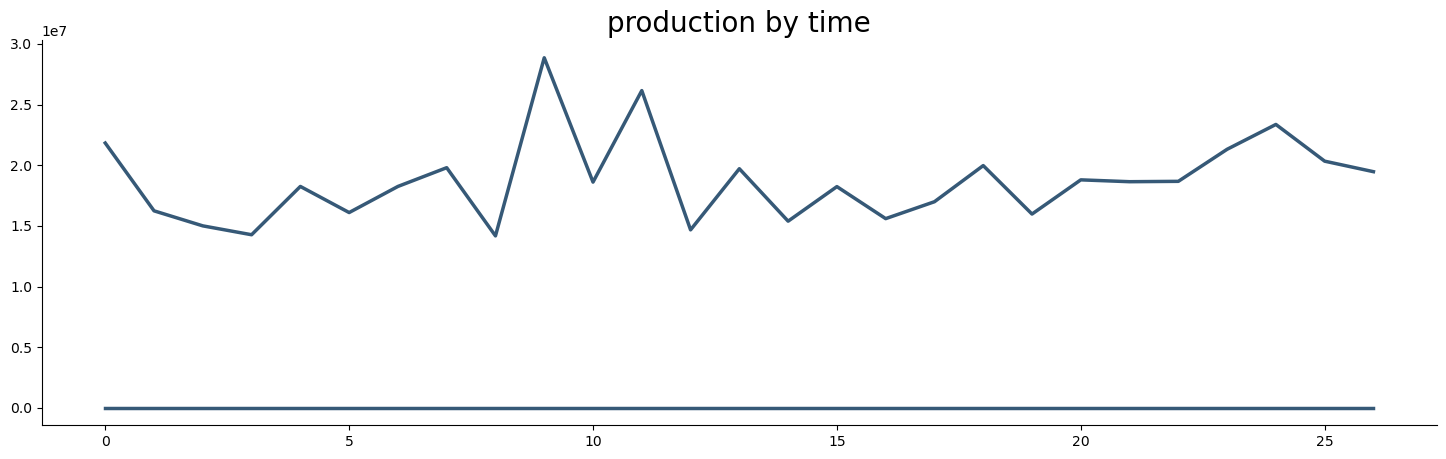

In [66]:
plt.title('production by time', size=20)
plt.plot(df);

In [67]:
# ADF stationarity test
# Returns: {Test statistic, P-value, Num lags used, {Critical values}, Estmation of maximized information criteria}
adfuller(df['Prod'])

(-2.3056886122836717,
 0.17013984438381202,
 2,
 24,
 {'1%': -3.7377092158564813,
  '5%': -2.9922162731481485,
  '10%': -2.635746736111111},
 548.5412794142353)

The P-value is just over 0.17, providing strong evidence that the dataset isn’t stationary. You’ve learned the concept of differencing in the previous articles. Now you’ll use it to calculate the N-th order difference. Here’s how the procedure looks for the first and second order:

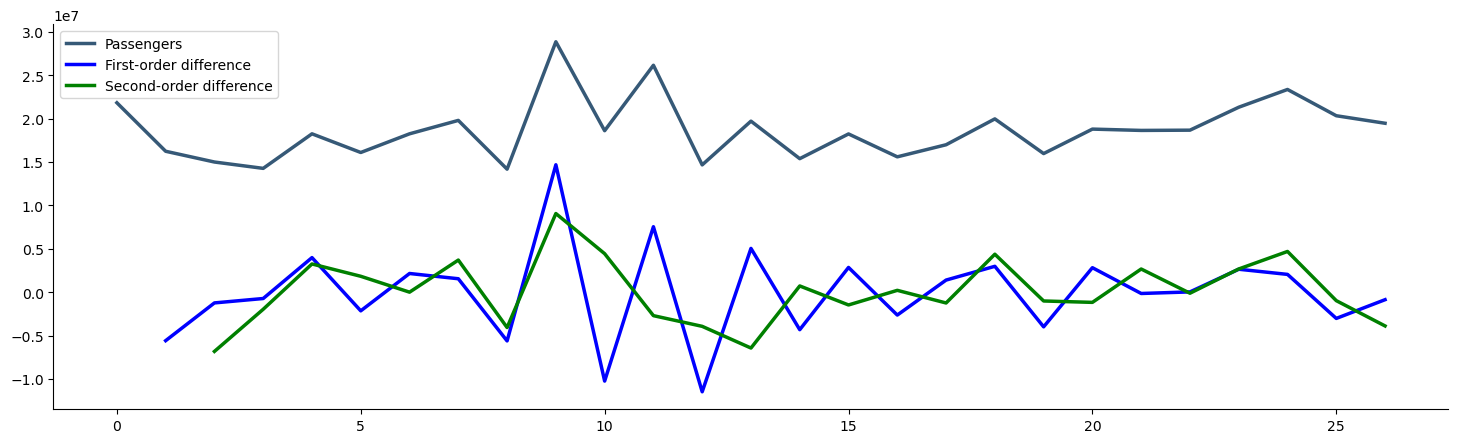

In [68]:
# First and second order difference
df['production_Diff1'] = df["Prod"].diff()
df['productin_Diff2'] = df["Prod"].diff(2)
plt.plot(df['Prod'], label='Passengers')
plt.plot(df['production_Diff1'], label='First-order difference', color='blue')
plt.plot(df['productin_Diff2'], label='Second-order difference', color='green')
plt.legend();

The differenced series looks more promising than the original data, but let’s use the ADF test to verify that claim:

In [69]:
df.isna().sum()

Year                0
Prod                0
production_Diff1    1
productin_Diff2     2
dtype: int64

In [70]:
data= df.dropna()


In [71]:
# adf_diff_1 = adfuller(df['production_Diff1'])
# adf_diff_2 = adfuller(df['productin_Diff2'])
# adf_diff_1

In [72]:
df.head()

,Year,Prod,production_Diff1,productin_Diff2
0,1995,21829000,NaN,NaN
1,1996,16239000,-5590000.0,NaN
2,1997,15000000,-1239000.0,-6829000.0
3,1998,14268000,-732000.0,-1971000.0
4,1999,18250000,3982000.0,3250000.0


In [73]:
df = df.dropna()
df = df.reset_index(drop=True)
print (df.head())

   Year      Prod  production_Diff1  productin_Diff2
0  1997  15000000        -1239000.0       -6829000.0
1  1998  14268000         -732000.0       -1971000.0
2  1999  18250000         3982000.0        3250000.0
3  2000  16098000        -2152000.0        1830000.0
4  2001  18250000         2152000.0              0.0


In [74]:
df.shape

(25, 4)

In [75]:
# Perform ADF test
adf_diff_1 = adfuller(df['production_Diff1'])
adf_diff_2 = adfuller(df['productin_Diff2'])

# Extract P-values
p_1 = adf_diff_1[1]
p_2 = adf_diff_2[1]

# Print
print(f'P-value for 1st order difference: {np.round(p_1, 5)}')
print(f'P-value for 2nd order difference: {np.round(p_2, 5)}')

P-value for 1st order difference: 0.0
P-value for 2nd order difference: 8e-05
